In [1]:
import moxing as mox
import pandas as pd
import numpy as np
#obs://jaguar-raw-images/camaras_dzilam_30_01_2023
dataset_path='obs://jaguar-raw-images/pronatura_zapotal'
ret = mox.file.exists(dataset_path)
dataset = {"path": []}
for p in mox.file.walk(dataset_path):
    path = p[0]
    images_path = [(path + "/" + i, path.split("/")[-1]) for i in p[2]]
    dataset["path"] += [path + "/" + i for i in p[2]]
    #dataset["label"] += [label for i in p[2]]
    
dataset_frame = pd.DataFrame.from_dict(dataset)
dataset_frame.head()

INFO:root:Using MoXing-v2.1.0.5d9c87c8-5d9c87c8
INFO:root:Using OBS-Python-SDK-3.20.9.1


,path
0,obs://jaguar-raw-images/pronatura_zapotal/2004...
1,obs://jaguar-raw-images/pronatura_zapotal/2004...
2,obs://jaguar-raw-images/pronatura_zapotal/2004...
3,obs://jaguar-raw-images/pronatura_zapotal/2004...
4,obs://jaguar-raw-images/pronatura_zapotal/2004...


In [59]:
dataset_frame

,path,year,specie,format
0,obs://jaguar-raw-images/pronatura_zapotal/2004...,2004,2004,txt
1,obs://jaguar-raw-images/pronatura_zapotal/2004...,2004,Leopardus wiedii,jpg
2,obs://jaguar-raw-images/pronatura_zapotal/2004...,2004,Mazama pandora,jpg
3,obs://jaguar-raw-images/pronatura_zapotal/2004...,2004,Mazama pandora,jpg
4,obs://jaguar-raw-images/pronatura_zapotal/2004...,2004,Mazama pandora,jpg
...,...,...,...,...
11719,obs://jaguar-raw-images/pronatura_zapotal/2022...,2022,Didelphis sp,JPG
11720,obs://jaguar-raw-images/pronatura_zapotal/2022...,2022,Didelphis sp,JPG
11721,obs://jaguar-raw-images/pronatura_zapotal/2022...,2022,Didelphis sp,JPG
11722,obs://jaguar-raw-images/pronatura_zapotal/2022...,2022,Didelphis sp,JPG


In [60]:
dataset_frame["path"][2500]

'obs://jaguar-raw-images/pronatura_zapotal/2014/439851.668_2363207.75_ZP7/ZP7_1/Leopardus weidii/439851.668_2363207.75_2014 (10).M4V'

In [2]:
dataset_frame["path"][2500].split("/")

['obs:',
 '',
 'jaguar-raw-images',
 'pronatura_zapotal',
 '2014',
 '439851.668_2363207.75_ZP7',
 'ZP7_1',
 'Leopardus weidii',
 '439851.668_2363207.75_2014 (10).M4V']

In [3]:
dataset_frame["path"][2].split("/")[4]

'2004'

In [61]:
dataset_frame["path"][33].split("/")[-1].split(".")

['437676', '318_2362436', '51_2004 (1)', 'jpg']

In [4]:
def extract_year(data):
    #extra the year from the url
    return data.split("/")[4]

In [5]:
dataset_frame["year"] = dataset_frame["path"].apply(extract_year)
dataset_frame

,path,year
0,obs://jaguar-raw-images/pronatura_zapotal/2004...,2004
1,obs://jaguar-raw-images/pronatura_zapotal/2004...,2004
2,obs://jaguar-raw-images/pronatura_zapotal/2004...,2004
3,obs://jaguar-raw-images/pronatura_zapotal/2004...,2004
4,obs://jaguar-raw-images/pronatura_zapotal/2004...,2004
...,...,...
11719,obs://jaguar-raw-images/pronatura_zapotal/2022...,2022
11720,obs://jaguar-raw-images/pronatura_zapotal/2022...,2022
11721,obs://jaguar-raw-images/pronatura_zapotal/2022...,2022
11722,obs://jaguar-raw-images/pronatura_zapotal/2022...,2022


In [6]:
def extract_specie(data):
    #extra the year from the url
    return data.split("/")[-2]

dataset_frame["specie"] = dataset_frame["path"].apply(extract_specie)
dataset_frame

,path,year,specie
0,obs://jaguar-raw-images/pronatura_zapotal/2004...,2004,2004
1,obs://jaguar-raw-images/pronatura_zapotal/2004...,2004,Leopardus wiedii
2,obs://jaguar-raw-images/pronatura_zapotal/2004...,2004,Mazama pandora
3,obs://jaguar-raw-images/pronatura_zapotal/2004...,2004,Mazama pandora
4,obs://jaguar-raw-images/pronatura_zapotal/2004...,2004,Mazama pandora
...,...,...,...
11719,obs://jaguar-raw-images/pronatura_zapotal/2022...,2022,Didelphis sp
11720,obs://jaguar-raw-images/pronatura_zapotal/2022...,2022,Didelphis sp
11721,obs://jaguar-raw-images/pronatura_zapotal/2022...,2022,Didelphis sp
11722,obs://jaguar-raw-images/pronatura_zapotal/2022...,2022,Didelphis sp


In [7]:
def extract_format(data):
    #extra the year from the url
    return data.split("/")[-1].split(".")[-1]

dataset_frame["format"] = dataset_frame["path"].apply(extract_format)
dataset_frame

,path,year,specie,format
0,obs://jaguar-raw-images/pronatura_zapotal/2004...,2004,2004,txt
1,obs://jaguar-raw-images/pronatura_zapotal/2004...,2004,Leopardus wiedii,jpg
2,obs://jaguar-raw-images/pronatura_zapotal/2004...,2004,Mazama pandora,jpg
3,obs://jaguar-raw-images/pronatura_zapotal/2004...,2004,Mazama pandora,jpg
4,obs://jaguar-raw-images/pronatura_zapotal/2004...,2004,Mazama pandora,jpg
...,...,...,...,...
11719,obs://jaguar-raw-images/pronatura_zapotal/2022...,2022,Didelphis sp,JPG
11720,obs://jaguar-raw-images/pronatura_zapotal/2022...,2022,Didelphis sp,JPG
11721,obs://jaguar-raw-images/pronatura_zapotal/2022...,2022,Didelphis sp,JPG
11722,obs://jaguar-raw-images/pronatura_zapotal/2022...,2022,Didelphis sp,JPG


In [70]:
def extract_Z(data):
    #extra the year from the url
    if len(data.split("/"))<9:
        return "NA"
    else :
        return data.split("/")[-3]

dataset_frame["z"] = dataset_frame["path"].apply(extract_Z)
dataset_frame

,path,year,specie,format,z
0,obs://jaguar-raw-images/pronatura_zapotal/2004...,2004,2004,txt,NA
1,obs://jaguar-raw-images/pronatura_zapotal/2004...,2004,Leopardus wiedii,jpg,NA
2,obs://jaguar-raw-images/pronatura_zapotal/2004...,2004,Mazama pandora,jpg,NA
3,obs://jaguar-raw-images/pronatura_zapotal/2004...,2004,Mazama pandora,jpg,NA
4,obs://jaguar-raw-images/pronatura_zapotal/2004...,2004,Mazama pandora,jpg,NA
...,...,...,...,...,...
11719,obs://jaguar-raw-images/pronatura_zapotal/2022...,2022,Didelphis sp,JPG,01
11720,obs://jaguar-raw-images/pronatura_zapotal/2022...,2022,Didelphis sp,JPG,01
11721,obs://jaguar-raw-images/pronatura_zapotal/2022...,2022,Didelphis sp,JPG,01
11722,obs://jaguar-raw-images/pronatura_zapotal/2022...,2022,Didelphis sp,JPG,01


In [72]:
dataset_frame.groupby(["z"]).count()


,path,year,specie,format
z,,,,
01,1430,1430,1430,1430
02,1708,1708,1708,1708
100CUDDY,503,503,503,503
300CUDDY,412,412,412,412
416565.896_2358707.23_ZAPR3,8,8,8,8
...,...,...,...,...
fotos_dificiles,4,4,4,4
sitio 1,18,18,18,18
sitio 2,116,116,116,116


In [8]:
df_year = dataset_frame.groupby(["year"]).count()
df_year

,path,specie,format
year,,,
2004,68,68,68
2005,80,80,80
2006,119,119,119
2007,52,52,52
2009,15,15,15
2011,38,38,38
2013,1939,1939,1939
2014,462,462,462
2015,963,963,963


In [9]:
list(df_year["path"])

[68, 80, 119, 52, 15, 38, 1939, 462, 963, 1265, 542, 459, 804, 401, 3647, 870]

INFO:matplotlib.font_manager:generated new fontManager
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


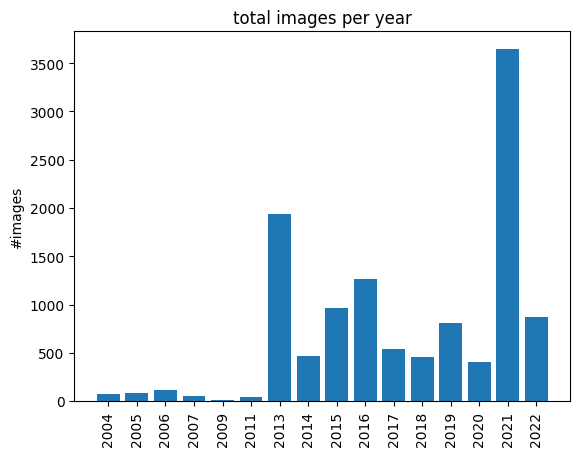

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

fruits = list(df_year.index)
counts = list(df_year["path"])
bar_labels = ['red', 'blue', '_red', 'orange']
bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

ax.bar(fruits, counts)

ax.set_ylabel('#images')
ax.set_title('total images per year')
#ax.legend(title='Fruit color')
plt.xticks(rotation = 90)

plt.show()

In [21]:
df_spc = dataset_frame.groupby(["specie"],sort=True).count()
df_spc=df_spc.sort_values(by="path",ascending=False)
df_spc

,path,year,format
specie,,,
Meleagris ocellata,4660,4660,4660
Humanos,826,826,826
Panthera onca,767,767,767
Puma concolor,580,580,580
Urocyon cinereoargenteus,493,493,493
...,...,...,...
Leopardus weidii cria,1,1,1
Penelope purpurascens,1,1,1
Sittasomus griseicapillus_comprobar,1,1,1


In [ ]:
list(df_spc.index)

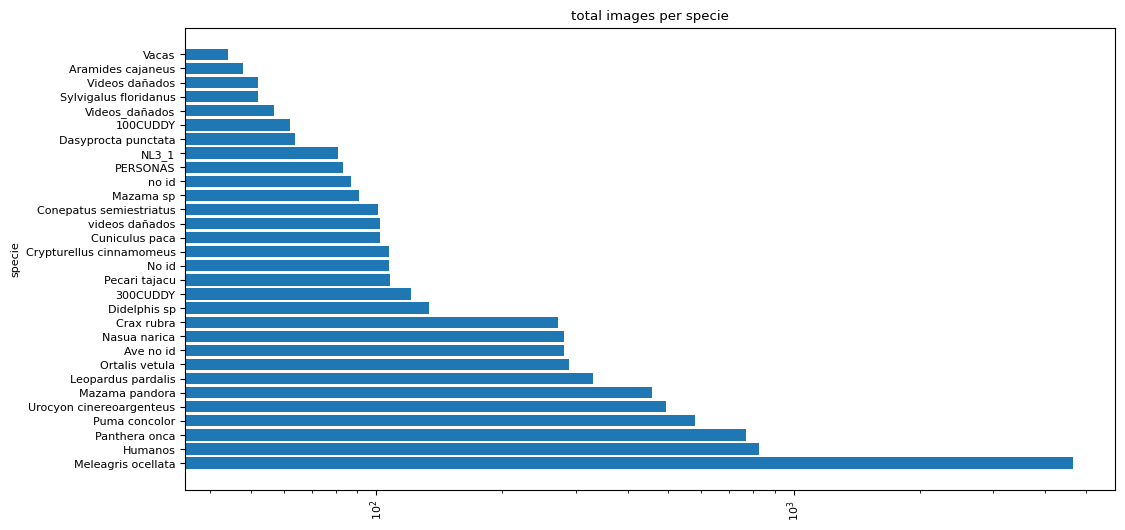

In [49]:
fig, ax = plt.subplots(figsize=(12, 6))

fruits = list(df_spc.index)[:30]
counts = list(df_spc["path"])[:30]
bar_labels = ['red', 'blue', '_red', 'orange']
bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

ax.barh(fruits, counts)

ax.set_ylabel('specie')
ax.set_title('total images per specie')
#ax.legend(title='Fruit color')
plt.xticks(rotation = 90)
plt.xscale("log")

plt.show()

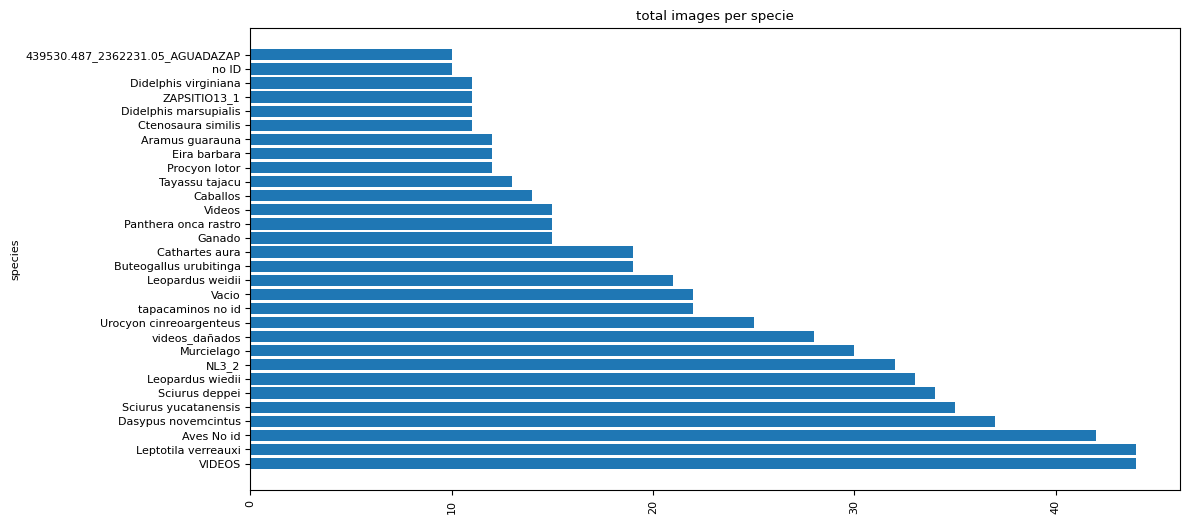

In [48]:
fig, ax = plt.subplots(figsize=(12, 6))

fruits = list(df_spc.index)[30:60]
counts = list(df_spc["path"])[30:60]
bar_labels = ['red', 'blue', '_red', 'orange']
bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

ax.barh(fruits, counts)

ax.set_ylabel('species')
ax.set_title('total images per specie')
#ax.legend(title='Fruit color')
plt.xticks(rotation = 90)
#plt.xscale("log")

plt.show()

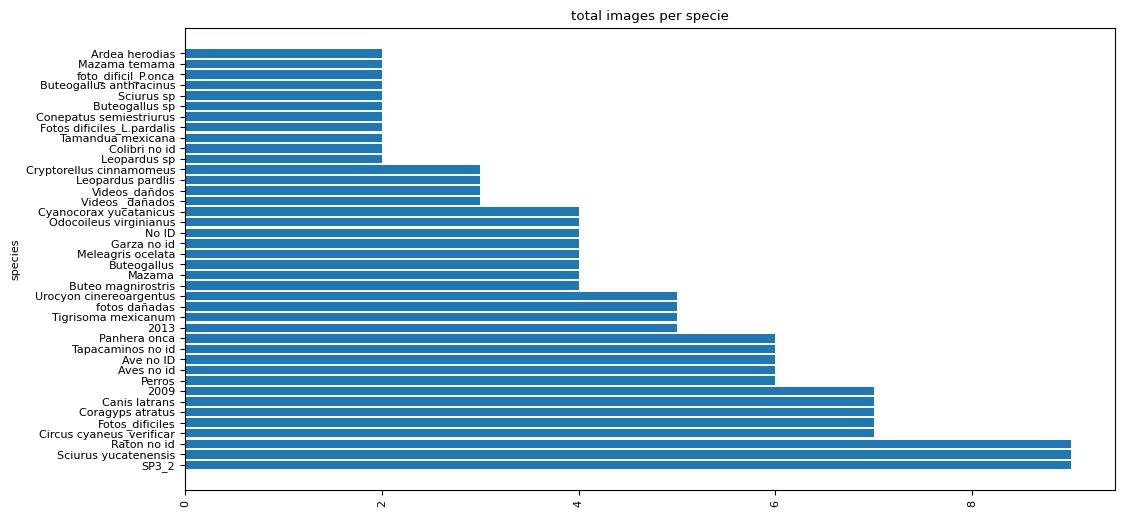

In [47]:
fig, ax = plt.subplots(figsize=(12, 6))

fruits = list(df_spc.index)[60:100]
counts = list(df_spc["path"])[60:100]
bar_labels = ['red', 'blue', '_red', 'orange']
bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

ax.barh(fruits, counts)

ax.set_ylabel('species')
ax.set_title('total images per specie')
#ax.legend(title='Fruit color')
plt.xticks(rotation = 90)
#plt.xscale("log")

plt.show()

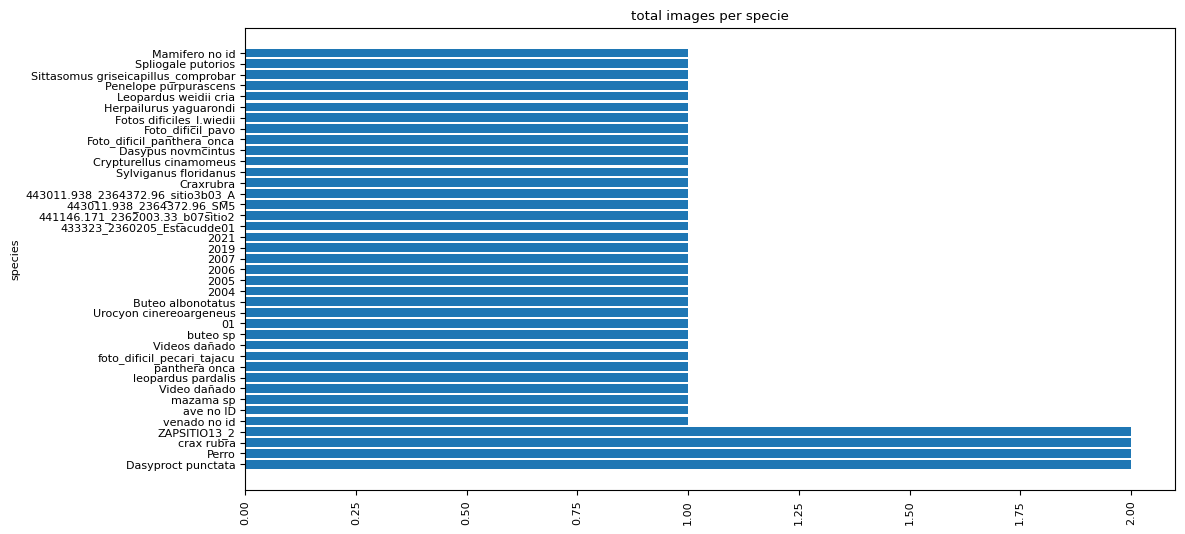

In [46]:
fig, ax = plt.subplots(figsize=(12, 6))

fruits = list(df_spc.index)[100:]
counts = list(df_spc["path"])[100:]
bar_labels = ['red', 'blue', '_red', 'orange']
bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

ax.barh(fruits, counts)

ax.set_ylabel('species')
ax.set_title('total images per specie')
#ax.legend(title='Fruit color')
plt.rcParams['font.size'] = '8'
plt.xticks(rotation = 90)
#plt.xscale("log")
#plt.setp(fontsize=8)


plt.show()

In [13]:
dataset_frame["path"][300]

'obs://jaguar-raw-images/pronatura_zapotal/2007/437260_2362892/Meleagris ocellata/437260_2362892_2007 (4).jpg'

In [52]:
df_f= dataset_frame.groupby("format").count()

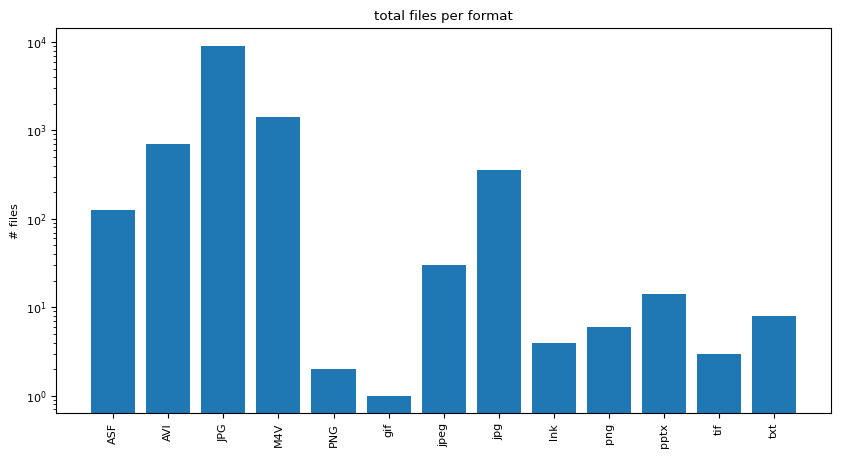

In [58]:
fig, ax = plt.subplots(figsize=(10,5))

fruits = list(df_f.index)
counts = list(df_f["path"])
bar_labels = ['red', 'blue', '_red', 'orange']
bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

ax.bar(fruits, counts)

ax.set_ylabel('# files')
ax.set_title('total files per format')
#ax.legend(title='Fruit color')
plt.rcParams['font.size'] = '8'
plt.xticks(rotation = 90)
plt.yscale("log")
#plt.setp(fontsize=8)


plt.show()

In [84]:
p_onca = dataset_frame.query("specie == 'Panthera onca'")
p_onca

,path,year,specie,format,z
40,obs://jaguar-raw-images/pronatura_zapotal/2004...,2004,Panthera onca,jpg,NA
41,obs://jaguar-raw-images/pronatura_zapotal/2004...,2004,Panthera onca,jpg,NA
42,obs://jaguar-raw-images/pronatura_zapotal/2004...,2004,Panthera onca,jpg,NA
43,obs://jaguar-raw-images/pronatura_zapotal/2004...,2004,Panthera onca,jpg,NA
44,obs://jaguar-raw-images/pronatura_zapotal/2004...,2004,Panthera onca,jpg,NA
...,...,...,...,...,...
11242,obs://jaguar-raw-images/pronatura_zapotal/2022...,2022,Panthera onca,JPG,01
11243,obs://jaguar-raw-images/pronatura_zapotal/2022...,2022,Panthera onca,JPG,01
11244,obs://jaguar-raw-images/pronatura_zapotal/2022...,2022,Panthera onca,JPG,01
11245,obs://jaguar-raw-images/pronatura_zapotal/2022...,2022,Panthera onca,JPG,01


In [86]:
 dataset_frame.groupby(["specie","year"]).count()

path  format    z
specie            year                   
01                2022     1       1    1
100CUDDY          2016    13      13   13
                  2020    49      49   49
2004              2004     1       1    1
2005              2005     1       1    1
...                      ...     ...  ...
tapacaminos no id 2015    22      22   22
venado no id      2016     1       1    1
videos dañados    2020   102     102  102
videos_dañados    2017    21      21   21
                  2019     7       7    7

[419 rows x 3 columns]

In [88]:
py_onc = p_onca.groupby(["year"]).count()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


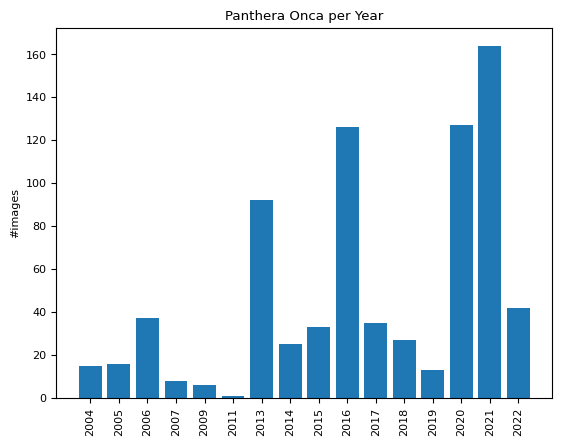

In [90]:
fig, ax = plt.subplots()

fruits = list(py_onc.index)
counts = list(py_onc["path"])
bar_labels = ['red', 'blue', '_red', 'orange']
bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

ax.bar(fruits, counts)

ax.set_ylabel('#images')
ax.set_title('Panthera Onca per Year')
#ax.legend(title='Fruit color')
plt.xticks(rotation = 90)

plt.show()

In [5]:
#obs://jaguar-raw-images/camaras_dzilam_30_01_2023
dataset_path='obs://jaguar-raw-images/camaras_dzilam_30_01_2023'
ret = mox.file.exists(dataset_path)
dataset = {"path": []}
for p in mox.file.walk(dataset_path):
    path = p[0]
    images_path = [(path + "/" + i, path.split("/")[-1]) for i in p[2]]
    dataset["path"] += [path + "/" + i for i in p[2]]
    #dataset["label"] += [label for i in p[2]]
    
dataset_frame = pd.DataFrame.from_dict(dataset)
dataset_frame

,path
0,obs://jaguar-raw-images/camaras_dzilam_30_01_2...
1,obs://jaguar-raw-images/camaras_dzilam_30_01_2...
2,obs://jaguar-raw-images/camaras_dzilam_30_01_2...
3,obs://jaguar-raw-images/camaras_dzilam_30_01_2...
4,obs://jaguar-raw-images/camaras_dzilam_30_01_2...
...,...
4404,obs://jaguar-raw-images/camaras_dzilam_30_01_2...
4405,obs://jaguar-raw-images/camaras_dzilam_30_01_2...
4406,obs://jaguar-raw-images/camaras_dzilam_30_01_2...
4407,obs://jaguar-raw-images/camaras_dzilam_30_01_2...


In [11]:
mox.file.copy_parallel("obs://jaguar-raw-images/pronatura_zapotal/2004/2004.txt","pronatura/")